In [24]:
import boto3
import os
from boto3.s3.transfer import TransferConfig
from boto3.s3.transfer import S3Transfer
from time import time
import json

"""
reference url:
http://stackoverflow.com/questions/34353824/boto3-disable-automatic-multipart-upload


"""

myconfig = TransferConfig(

    multipart_threshold=9999999999999999, # workaround for 'disable' auto multipart upload
    #multipart_threshold=8000000,
    max_concurrency=10,
    num_download_attempts=10,
)

def _aws_credentials():
    with open('/Users/sunq3/workspace/nci_match/ir_data_api/.s3_config.json') as config_file:
        config = json.load(config_file)
        return (config['aws_access_key_id'], config['aws_secret_access_key'])

#initialize aws credentails for s3 access
access_key, secret_key = _aws_credentials()


connection = boto3.client(service_name='s3',
        region_name='us-east-1',
        api_version=None,
        use_ssl=True,
        verify=True,
        aws_access_key_id=access_key,
        aws_secret_access_key=secret_key,
        aws_session_token=None,
        config=None)

transfer=S3Transfer(connection,myconfig)



In [25]:
def upload(file_path):
    filename = os.path.basename(file_path)
    transfer.upload_file(file_path, 'csun1', filename)
    print 'done.'
    



In [18]:
import time 

start = time.time()
upload('/Users/sunq3/match_data/test1.tar')
done = time.time()
print 'consumed:', done - start

done.
consumed: 42.2327740192


In [ ]:
'''
no-multi, test1: 163.913408041

---------------------------------------------------------------------------
ClientError                               Traceback (most recent call last)
<ipython-input-26-98b3fd8eec8e> in <module>()
      2 
      3 start = time.time()
----> 4 upload('/Users/sunq3/match_data/test2.tar')
      5 done = time.time()
      6 print 'consumed:', done - start

<ipython-input-25-d58f82bac9ec> in upload(file_path)
      1 def upload(file_path):
      2     filename = os.path.basename(file_path)
----> 3     transfer.upload_file(file_path, 'csun1', filename)
      4     print 'done.'
      5 

/Users/sunq3/anaconda/lib/python2.7/site-packages/boto3/s3/transfer.pyc in upload_file(self, filename, bucket, key, callback, extra_args)
    639             self._multipart_upload(filename, bucket, key, callback, extra_args)
    640         else:
--> 641             self._put_object(filename, bucket, key, callback, extra_args)
    642 
    643     def _put_object(self, filename, bucket, key, callback, extra_args):

/Users/sunq3/anaconda/lib/python2.7/site-packages/boto3/s3/transfer.pyc in _put_object(self, filename, bucket, key, callback, extra_args)
    649                                callback=callback) as body:
    650             self._client.put_object(Bucket=bucket, Key=key, Body=body,
--> 651                                     **extra_args)
    652 
    653     def download_file(self, bucket, key, filename, extra_args=None,

/Users/sunq3/anaconda/lib/python2.7/site-packages/botocore/client.pyc in _api_call(self, *args, **kwargs)
    256                     "%s() only accepts keyword arguments." % py_operation_name)
    257             # The "self" in this scope is referring to the BaseClient.
--> 258             return self._make_api_call(operation_name, kwargs)
    259 
    260         _api_call.__name__ = str(py_operation_name)

/Users/sunq3/anaconda/lib/python2.7/site-packages/botocore/client.pyc in _make_api_call(self, operation_name, api_params)
    546 
    547         if http.status_code >= 300:
--> 548             raise ClientError(parsed_response, operation_name)
    549         else:
    550             return parsed_response

ClientError: An error occurred (EntityTooLarge) when calling the PutObject operation: Your proposed upload exceeds the maximum allowed size




multi, test1: 42.2327740192
multi, test2: 107.91958189
multi, test3: 135.046941996
multi, test4: 168.786673069
multi, test5: 232.330732107
multi, test6: 257.369575977



'''

In [26]:
import time 

start = time.time()
upload('/Users/sunq3/match_data/test2.tar')
done = time.time()
print 'consumed:', done - start

ClientError: An error occurred (EntityTooLarge) when calling the PutObject operation: Your proposed upload exceeds the maximum allowed size

In [20]:
import time 

start = time.time()
upload('/Users/sunq3/match_data/test3.tar')
done = time.time()
print 'consumed:', done - start

done.
consumed: 135.046941996


In [21]:
start = time.time()
upload('/Users/sunq3/match_data/test4.tar')
done = time.time()
print 'consumed:', done - start

done.
consumed: 168.786673069


In [22]:
start = time.time()
upload('/Users/sunq3/match_data/test5.tar')
done = time.time()
print 'consumed:', done - start

done.
consumed: 232.330732107


In [23]:
start = time.time()
upload('/Users/sunq3/match_data/test6.tar')
done = time.time()
print 'consumed:', done - start

done.
consumed: 257.369575977


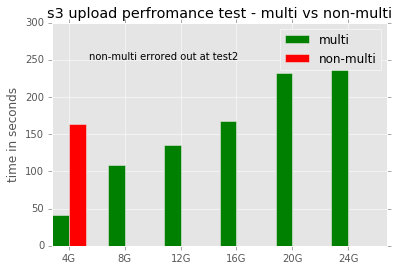

In [47]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

'''
multi, test1: 42.2327740192
multi, test2: 107.91958189
multi, test3: 135.046941996
multi, test4: 168.786673069
multi, test5: 232.330732107
multi, test6: 257.369575977
'''

multi = (42, 108, 135, 168, 232, 257)
non_multi = (164, 0, 0, 0, 0, 0)
ind = np.arange(6)

width = 0.3

fig, ax = plt.subplots()
bar1 = ax.bar(ind,multi,width, color='g')
bar2 = ax.bar(ind+width,non_multi,width, color='r')

ax.set_ylabel('time in seconds')
ax.set_title('s3 upload perfromance test - multi vs non-multi')
ax.set_xticks(ind+width)
ax.set_xticklabels(('4G','8G','12G','16G','20G','24G'))

ax.text(2,250,'non-multi errored out at test2',horizontalalignment='center')

ax.legend((bar1[0],bar2[0]),('multi','non-multi'))

plt.show()




